In [71]:
# Import some necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# Load the data set:
Data_set = pd.read_csv('/content/SLR_data_set.csv')

In [73]:
# Check shape of the data:
Data_set.shape

(100, 2)

In [74]:
# First 5 data points:
Data_set.head(5)

,Scholastic Assessment Test,Grade Point Average
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [76]:
# Last 5 data point:
Data_set.tail(5)

,Scholastic Assessment Test,Grade Point Average
95,1934,3.54
96,1861,3.58
97,1931,3.58
98,1933,3.59
99,1778,3.59


In [77]:
# Column name in our data set:
Data_set.columns

Index(['Scholastic Assessment Test', 'Grade Point Average'], dtype='object')

Independent variable: Scholastic Assessment Test \\
Dependent variable/Target variable: Grade Point Average. \\
Here both variables are Numerical.


In [79]:
Data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Scholastic Assessment Test  100 non-null    int64  
 1   Grade Point Average         100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [80]:
Data_set.describe()

,Scholastic Assessment Test,Grade Point Average
count,100.000000,100.000000
mean,1850.760000,3.360500
std,101.566331,0.258845
min,1634.000000,2.400000
25%,1776.500000,3.270000
50%,1850.000000,3.410000
75%,1934.000000,3.520000
max,2050.000000,3.810000


In [81]:
# Check missing values:
Data_set.isnull().sum()

Scholastic Assessment Test    0
Grade Point Average           0
dtype: int64

No missing values in our data set.

In [82]:
# Check duplicate values:
Data_set.duplicated().sum()

17

In [83]:
# Find duplicate values
duplicates = Data_set[Data_set.duplicated(keep=False)]

# Get the indexes of duplicate values
indexes_of_duplicates = duplicates.index

print(indexes_of_duplicates)

Int64Index([ 6,  7, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
            71, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
            99],
           dtype='int64')


In [88]:
# Drop duplicate rows based on all columns
Data_set = Data_set.drop_duplicates()

In [89]:
Data_set.shape

(83, 2)

In [90]:
# Calculate the correlation coefficient
correlation_coefficient = Data_set['Scholastic Assessment Test'].corr(Data_set['Grade Point Average'])
print(round(correlation_coefficient, 4))

0.6337


There is a positive linear relationship this indicates that as Scholastic Assessment Test variable increases, the other variable Grade Point Average tends to increase as well.

In [92]:
# Define independent variable
x = Data_set['Scholastic Assessment Test'].values

# Define dependent variable
y = Data_set['Grade Point Average'].values

In [93]:
x_mean = np.mean(x)
y_mean = np.mean(y)

y = b + m * x . Here we will find value of b and m.
We know m = S_xy/ S_xx and b = y_mean - m*x_mean

In [94]:
# Estimating coefficients of the line:

S_xy = np.sum((x - x_mean) * (y - y_mean))
S_xx = np.sum((x - x_mean)**2)
m = S_xy/S_xx
print("Slop of the line will be", m)

Slop of the line will be 0.001637809486965399


In [95]:
b = y_mean - m*x_mean
print("Intercept of the line will be", b)

Intercept of the line will be 0.31040616899890594


In [96]:
# Prediction vector
y_pred = b + m*x

Text(0, 0.5, 'Grade Point Average')

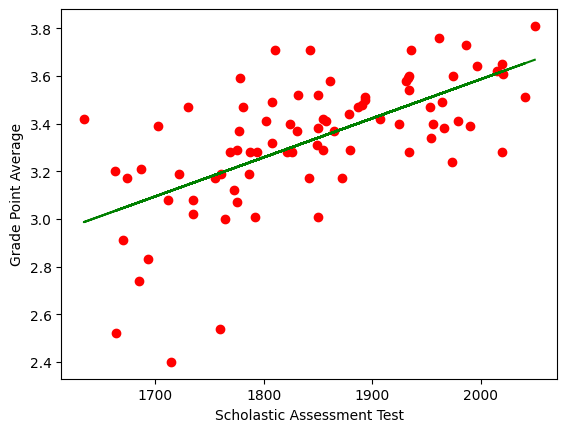

In [97]:
# Plot the actual values:
plt.scatter(x, y, color = 'red')

# Plot the regression line:
plt.plot(x, y_pred, color = 'green')
plt.xlabel('Scholastic Assessment Test')
plt.ylabel('Grade Point Average')

In [98]:
# Grade point Average when Scholastic Assessment Test = 1750
y_1750 = b + m * (1750)
print(y_1750)

3.1765727711883542


In [99]:
# Split the data set into training - testing sets (70:30)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [100]:
# Print the shapes of traning and testing data sets:
print("X_train shape:", len(x_train))
print("X_test shape:", len(x_test))
print("y_train shape:", len(y_train))
print("y_test shape:", len(y_test))

X_train shape: 58
X_test shape: 25
y_train shape: 58
y_test shape: 25


In [102]:
# Prediction on the test data set
y1_pred = b+ m*(x_test)

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Square Error
mse = mean_squared_error(y_test, y1_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.03869039815670508


In [104]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y1_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.1348530248077267


In [105]:
# R-squared
r2 = r2_score(y_test, y1_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.4801958098395397
